In [1]:
from src.experiments import StockMixer_Figure3
from src.utils import set_seed

import numpy as np

In [2]:
# global parameters
epochs = 50
activation_functions = ["Hardswish", "ReLU", "GELU", "Sigmoid", "tanh"]
seeds = [1, 2, 3]

In [3]:
for act in activation_functions:
    mse_lst = []
    IC_lst = []
    RIC_lst = []
    sharpe5_lst = []
    prec_10_lst = []

    for seed in seeds:
        set_seed(seed)
        test_performance = StockMixer_Figure3(seq_len=16,
                                        hidden_dim=64,
                                        market_dim=40,
                                        scale_factors=[1, 2, 4, 8],
                                        alpha=0.1,
                                        epochs=epochs,
                                        seed=seed,
                                        load_weights=True, # for time-saving
                                        act=act
                                        )
        mse_lst.append(test_performance["mse"])
        IC_lst.append(test_performance["IC"])
        RIC_lst.append(test_performance["RIC"])
        sharpe5_lst.append(test_performance["sharpe5"])
        prec_10_lst.append(test_performance["prec_10"])
        
    print("\n\n")
    print(f"Activation Function: {act}")
    print(f"MSE: {np.mean(mse_lst):0.4f} +/- {np.std(mse_lst):0.4f}")
    print(f"IC: {np.mean(IC_lst):0.4f} +/- {np.std(IC_lst):0.4f}")
    print(f"RIC: {np.mean(RIC_lst):0.4f} +/- {np.std(RIC_lst):0.4f}")
    print(f"Sharpe5: {np.mean(sharpe5_lst):0.4f} +/- {np.std(sharpe5_lst):0.4f}")
    print(f"Prec@10: {np.mean(prec_10_lst):0.4f} +/- {np.std(prec_10_lst):0.4f}")






Activation Function: Hardswish
MSE: 0.0028 +/- 0.0027
IC: 0.0228 +/- 0.0032
RIC: 0.3187 +/- 0.0061
Sharpe5: 1.3117 +/- 0.2514
Prec@10: 0.5288 +/- 0.0049



Activation Function: ReLU
MSE: 0.0012 +/- 0.0004
IC: 0.0204 +/- 0.0059
RIC: 0.3149 +/- 0.0541
Sharpe5: 1.9191 +/- 0.1822
Prec@10: 0.5381 +/- 0.0123



Activation Function: GELU
MSE: 0.0068 +/- 0.0084
IC: 0.0229 +/- 0.0063
RIC: 0.3109 +/- 0.0206
Sharpe5: 1.1910 +/- 1.4032
Prec@10: 0.5181 +/- 0.0145



Activation Function: Sigmoid
MSE: 0.0046 +/- 0.0056
IC: 0.0208 +/- 0.0044
RIC: 0.2946 +/- 0.0071
Sharpe5: 1.2576 +/- 0.3693
Prec@10: 0.5315 +/- 0.0055



Activation Function: tanh
MSE: 0.0013 +/- 0.0003
IC: 0.0222 +/- 0.0081
RIC: 0.3440 +/- 0.0781
Sharpe5: 1.2143 +/- 0.2634
Prec@10: 0.5203 +/- 0.0047


# Replicate Figure 5 in the paper with my experiments results

Hardswish
IC: 0.0228 +/- 0.0032
RIC: 0.3187 +/- 0.0061
Sharpe5: 1.3117 +/- 0.2514
Prec@10: 0.5288 +/- 0.0049

ReLU
IC: 0.0204 +/- 0.0059
RIC: 0.3149 +/- 0.0541
Sharpe5: 1.9191 +/- 0.1822
Prec@10: 0.5381 +/- 0.0123

GELU
IC: 0.0229 +/- 0.0063
RIC: 0.3109 +/- 0.0206
Sharpe5: 1.1910 +/- 1.4032
Prec@10: 0.5181 +/- 0.0145

Sigmoid
IC: 0.0208 +/- 0.0044
RIC: 0.2946 +/- 0.0071
Sharpe5: 1.2576 +/- 0.3693
Prec@10: 0.5315 +/- 0.0055

tanh
IC: 0.0222 +/- 0.0081
RIC: 0.3440 +/- 0.0781
Sharpe5: 1.2143 +/- 0.2634
Prec@10: 0.5203 +/- 0.0047


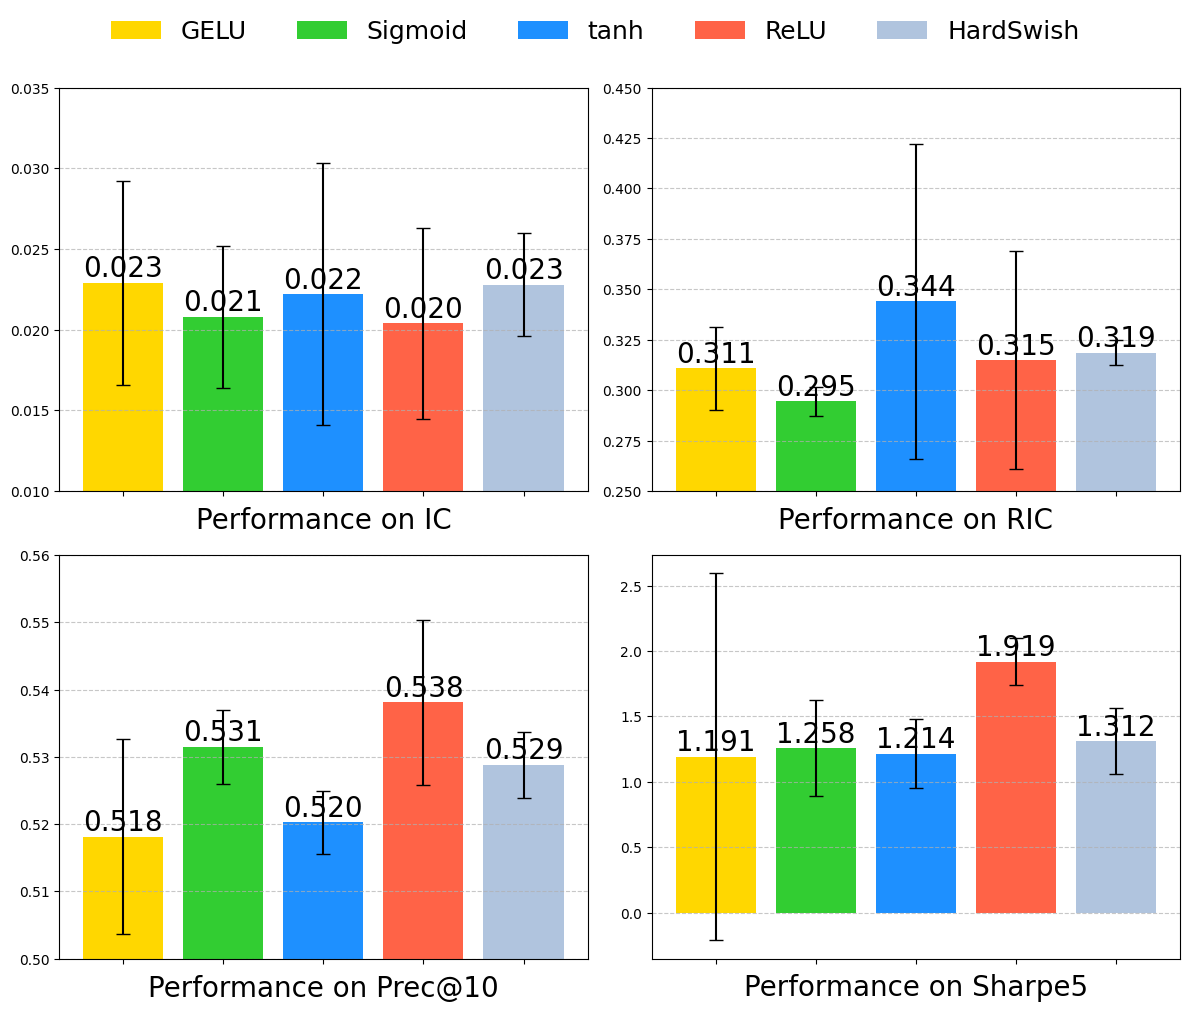

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


# Activation functions and metrics data
activation_functions = ['GELU', 'Sigmoid', 'tanh', 'ReLU', 'HardSwish']
colors = ['#FFD700', '#32CD32', '#1E90FF', '#FF6347', '#B0C4DE']  # Unique colors for each activation function

metrics = {
    'IC': {
        'values': [0.0229, 0.0208, 0.0222, 0.0204, 0.0228],
        'std': [0.0063, 0.0044, 0.0081, 0.0059, 0.0032],
        'ylim': (0.01, 0.035)  # y-axis bounds for IC
    },
    'RIC': {
        'values': [0.3109, 0.2946, 0.3440, 0.3149, 0.3187],
        'std': [0.0206, 0.0071, 0.0781, 0.0541, 0.0061],
        'ylim': (0.25, 0.45)  # y-axis bounds for RIC
    },
    'Prec@10': {
        'values': [0.5181, 0.5315, 0.5203, 0.5381, 0.5288],
        'std': [0.0145, 0.0055, 0.0047, 0.0123, 0.0049],
        'ylim': (0.5, 0.56)  # y-axis bounds for Prec@10
    },
    'Sharpe5': {
        'values': [1.1910, 1.2576, 1.2143, 1.9191, 1.3117],
        'std': [1.4032, 0.3693, 0.2634, 0.1822, 0.2514]
    }
}

# Set up the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Plot each metric
for i, (metric, data) in enumerate(metrics.items()):
    x = np.arange(len(activation_functions))
    bars = axes[i].bar(x, data['values'], yerr=data['std'], capsize=5, color=colors)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels([])  # Hide x-axis tick labels
    axes[i].set_title("")  # Remove the title from the top
    axes[i].set_xlabel(f"Performance on {metric}", fontsize=20)  # Add the title as x-axis label
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set y-axis bounds if specified
    if 'ylim' in data:
        axes[i].set_ylim(data['ylim'])

    # Annotate the bars with their values
    for bar, value in zip(bars, data['values']):
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.3f}",
                     ha='center', va='bottom', fontsize=20)

# Create custom legend handles
legend_handles = [Patch(facecolor=color, label=label) for color, label in zip(colors, activation_functions)]

# Create a single legend for all subplots
fig.legend(handles=legend_handles, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.02), fontsize=18, frameon=False)

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the legend at the top
plt.show()